In [9]:
import obspy
import numpy as np
import math
import cmath
import serveobspy
from obspy import UTCDateTime, read, Trace, Stream
import dragrace
import SeismogramTasks as sTasks
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib
%matplotlib inline

In [10]:
# OPEN AND CLEAN UP THE DATA
# CREATE X Y AND AVG LISTS

f = open('./fallClean/Figures/Fall_picks_mph_24_no60_throwOut.csv' , 'r')
lines = f.readlines()
#print(lines)

xDist = [] # POPULATE WITH 60, 330, 660, 1K
ySpeed = [] # POPULATE WITH SPEEDS CALCULATED FROM EXCEL
xRace = []
yRace = []

name = [] # POPULATE WITH RACE CODE
#avg = ['722.1057889','723.0224509','795.8333945','713.8876813'] # I USED EXCEL TO GET THIS (first_picks_fall)
#for i in range(0,len(avg)):
#    avg[i]=float(avg[i])

#print(avg,'average')

# remove \n and make list of names
name = lines[0].split(',')[1:] # remove first cell
name[-1] = name[-1].replace('\n','') 

# make xDist list
for rows in range(1,len(lines)):
    splitList = lines[rows].split(',')
    #print(splitList)

    for values in range(1,len(splitList)):
        ySpeed.append(float(splitList[values].replace('\n','')))
        xDist.append(float( splitList[0].replace('\n','')))

#print(ySpeed,'y')
print(xDist,'x')

[354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 684.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0, 1024.0] x


In [11]:
# OPEN AND CLEAN UP THE Racer 660 speed DAT

f = open('./fallClean/Figures/Fall_racers_mph.csv' , 'r')
lines = f.readlines()
#print(lines)

# POPULATE WITH SPEEDS CALCULATED FROM EXCEL
xRace = []
yRace = []

name = [] # POPULATE WITH RACE CODE
#avg = ['722.1057889','723.0224509','795.8333945','713.8876813'] # I USED EXCEL TO GET THIS (first_picks_fall)
#for i in range(0,len(avg)):
#    avg[i]=float(avg[i])

#print(avg,'average')

# remove \n and make list of names
name = lines[0].split(',')[1:] # remove first cell
name[-1] = name[-1].replace('\n','') 

# make xDist list
for rows in range(1,len(lines)):
    splitList = lines[rows].split(',')
    #print(splitList)

    for values in range(1,len(splitList)):
        yRace.append(float(splitList[values].replace('\n','')))
        xRace.append(float( splitList[0].replace('\n','')))

print(yRace,'y')
print(xRace,'x')

[287.72, 283.73, 290.32, 206.7, 88.61, 274.05, 291.26, 278.46, 287.23, 287.78, -1000.0, 288.58, 290.32, 289.32, 210.73, 246.71, 284.56, 284.33, 288.15, 282.01, 290.94, 214.31, 289.14, 289.38, 284.09, 203.43, 289.38, 150.61, 283.07, 240.89, 290.94, 291.13, 276.29, 284.51, 285.11, 282.24, 325.77, 331.69, 325.92, 168.75, 91.99, 312.35, 328.14, 317.72, 325.14, 326.24, -1000.0, 328.46, 325.92, 327.9, 190.78, 333.25, 330.96, 324.59, 328.06, 328.46, 329.5, 184.19, 328.7, 323.5, 324.83, 183.94, 325.92, 131.79, 316.15, 249.53, 329.5, 321.04, 323.12, 321.81, 328.06, 332.18] y
[660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0

-0.00767468996148 751.708575994


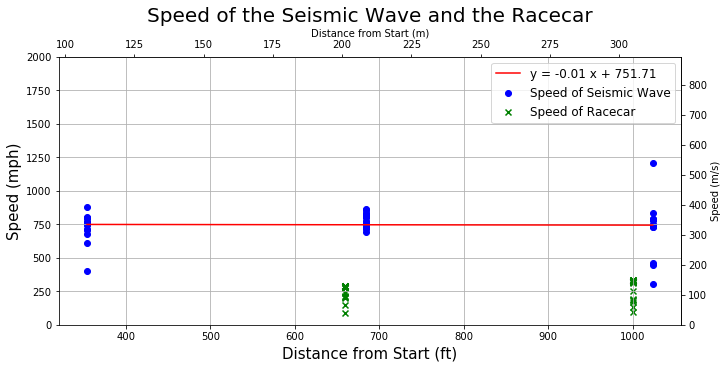

In [12]:
def ft2m(x):
    return x / 3.281

def m2ft(x):
    return x * 3.281

def mph2ms(y):
    return y/ 2.237

def ms2mph(y):
    return y * 2.237

# Find Line of Best FIT
x = xDist
y = ySpeed
m, b = np.polyfit(x, y, 1)
print(m,b)

bestFit = []
for i in xDist:
    bestFit.append(m * i + b)

fig, ax = plt.subplots(figsize=(10, 5),constrained_layout=True)
plt.ylim(0,2000)
ax.scatter(xDist,ySpeed, color = 'b', marker='o', label  ='Speed of Seismic Wave' )
ax.scatter(xRace,yRace, color = 'g', marker='x', label = 'Speed of Racecar')
ax.plot(xDist,bestFit, color = 'r', label = "y = " + str(round(m,2)) + " x + " + str(round(b,2)))

plt.xlabel('Distance from Start (ft)',fontsize = 15)
plt.xticks(fontsize = 10)
plt.ylabel('Speed (mph)',fontsize = 15)
plt.yticks(fontsize = 10)


secax = ax.secondary_xaxis('top', functions=(ft2m,m2ft))
secax.set_xlabel('Distance from Start (m)',fontsize = 10)

secaxy = ax.secondary_yaxis('right', functions=(mph2ms,ms2mph))
secaxy.set_ylabel('Speed (m/s)',fontsize = 10)

plt.legend(loc = 'best',fontsize = 12)
plt.title('Speed of the Seismic Wave and the Racecar',fontsize = 20)

plt.grid()
plt.savefig('./fallClean/Figures/Speed_wave_car_noOut.png', bbox_inches='tight')
plt.show()